<a href="https://colab.research.google.com/github/Liztgarcia/TS_Dashboard/blob/main/TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


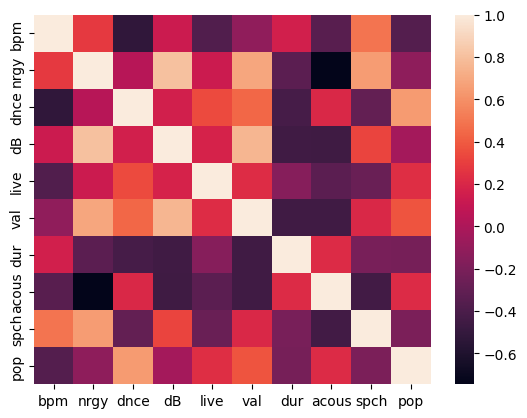

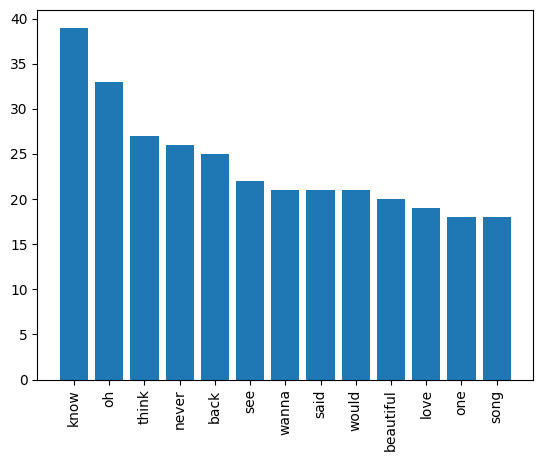

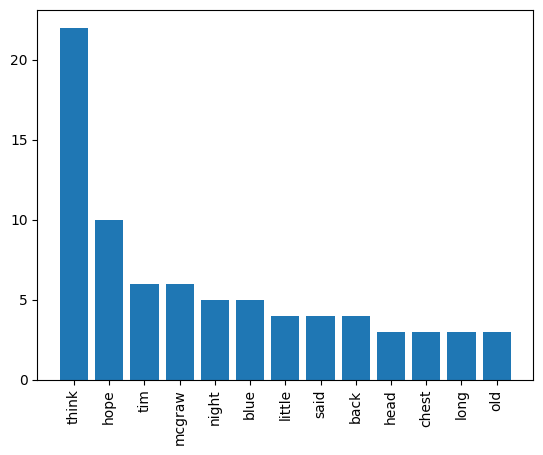

<ipython-input-5-0d2064e25181>:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_album10['sentiment'] = df_album10['lyrics'].apply(lambda x: sentiment_analyzer_scores_album(x))


In [5]:
!pip install streamlit
!pip install vaderSentiment

import streamlit as st
from altair.vegalite.v4.schema.channels import Key
from numpy.lib.function_base import disp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import streamlit.components.v1 as components

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


with st.container():
    header_image = 'https://i.ibb.co/GM1JYrM/header.jpg'
    st.image(header_image, width=800,use_column_width= 'auto')

    st.title('Taylor Swift: dashboard interactivo')
    st.markdown(""" This is a Taylor Swift intgeractive dashboard. Here you can analize all of her albums. Lets do it!.""")

with st.container():
    st.header('Teardrops on my dataframe')
    st.markdown(""" About this **dataframe**""")
    st.markdown("""
    -Contains Taylor albums since *Fearless (Taylor's Version)*
    - The lyrics are from genius.com
    -The audio characteristics from each song are from Spotify
        - Mood: Danceability, Valence, Energy, Tempo
        - Properties: Loudness, Speechiness
        - Context: Liveness, Acousticness, Genre.""")

    df = pd.read_csv('/content/MasterTaylorSwiftSongs.csv')
    df.drop(df[df.lyrics.isnull()].index, inplace = True)
    df = df.drop(columns=['sel','main_discography'])

    st.write(df.head(14))

with st.container():
    st.header('Quick Look')
    st.markdown ('Quick analysis per album and the song you chose')

    sel_col, disp_col = st.columns(2)

    widget_album = sel_col.selectbox('Choose an album',options=['Taylor Swift','Fearless','Speak Now','Red','1989','Reputation','Lover','Folklore','Evermore'],index = 0)
    df_album = df[df['album'] == widget_album]
    canciones_album = df_album['title'].unique().tolist()
    canciones_album.append('All')
    widget_cancion = disp_col.selectbox('Choose a song',options=canciones_album,index = (len(canciones_album)-1))

    col1, col2 = st.columns(2)

    with col1:
        st.write('Album: ',widget_album)
        st.write('Songs:', df_album['title'].count())
        st.write('Release: ',df_album['year'].max())
        st.write('Bbpm: ',round(df_album['bpm'].mean(),2))
        st.write('Energy: ',round(df_album['nrgy'].mean(),2))
        st.write('Danceability: ',round(df_album['dnce'].mean(),2))
        st.write('dB: ',round(df_album['dB'].mean(),2))
        st.write('Liveness: ',round(df_album['live'].mean(),2))
        st.write('Valence: ',round(df_album['val'].mean(),2))
        st.write('Duration: ',round(df_album['dur'].mean(),2))
        st.write('Acousticness: ',round(df_album['acous'].mean(),2))
        st.write('Speechiness: ',round(df_album['spch'].mean(),2))

    with col2:

            def set_image(widget_selection):
                if widget_selection == 'Taylor Swift':
                    return 'https://i.ibb.co/7GyHCcF/Taylor-Swift-Albums-Taylor-Swift-Credit-Big-Machine.jpg'
                elif widget_selection == 'Fearless':
                    return 'https://i.ibb.co/0Zs3z4s/Taylor-swift-albums-Taylor-Swift-Fearless-Credit-Big-Machine.jpg'
                elif widget_selection == 'Speak Now':
                    return 'https://i.ibb.co/tbmfnmX/Taylor-Swift-albums-Taylor-Swift-Speak-Now-Credit-Big-Machine.jpg'
                elif widget_selection == 'Red':
                    return 'https://i.ibb.co/ScYfmKw/Taylor-Swift-albums-Taylor-Swift-Red-Credit-Big-Machine.jpg'
                elif widget_selection == '1989':
                    return 'https://i.ibb.co/gzWYdmb/Taylor-Swift-albums-Taylor-Swift-1989-Credit-Big-Machine.jpg'
                elif widget_selection == 'Reputation':
                    return 'https://i.ibb.co/KKX3PN8/reputation.jpg'
                elif widget_selection == 'Lover':
                    return 'https://i.ibb.co/Fz8RTTj/Lover.jpg'
                elif widget_selection == 'Folklore':
                    return 'https://i.ibb.co/1d23NqV/folklore.jpg'
                else:
                    return 'https://i.ibb.co/FYcV2Cm/evermore.jpg'

            imagen = set_image(widget_album)
            st.image(imagen, width=300,use_column_width= 'auto')


    with st.expander("Lets check the explanaition:"):
        st.markdown("""
        All is expressed in average""")
        st.markdown("""
        Entre más grande sea el valor más describe esa característica al álbum """)

with st.container():
    st.header('Deep look')
    st.markdown ("""A deep look about the characteristics from Spotify""")


    col3, col4 = st.columns(2)

    with col3:

        st.write('Album: ',widget_album)

        columns_to_drop = ['title', 'artist', 'album', 'genre', 'lyrics', 'Podcast', 'URL']
        df_albumcor = df_album.drop(columns=columns_to_drop + ['track_n', 'year'])

        fig, ax = plt.subplots()
        sns.heatmap(df_albumcor.corr(), ax=ax)
        st.write(fig)

    with col4:
        st.markdown(""                         "")
        st.markdown("""Las correlaciones nos permiten medir la fuerza y dirección de una relación de dos variables.
        En el caso de este heatmap, estamos representando las correlaciones entre las características de audio.""")
        st.markdown("""
        Dependiendo el álbum que elijas, podrías encontrar relaciones diferentes.
        Por experiencia las corr más relevantes deberían ser:
        - acoust vs dnce
        - dnce vs energy""")

    st.subheader('Compared caractheristics from 3 songs: ')


    col5, col6, col7=st.columns(3)

    with col5:
        widget_album5 = st.selectbox('álbum 1: ',options=['Taylor Swift','Fearless','Speak Now','Red','1989','reputation','Lover','folklore','evermore'],index = 0)
        df_album5 = df[df['album'] == widget_album5]
        canciones_album5 = df_album5['title'].unique().tolist()
        canciones_album5.append('Todas')
        widget_cancion5 = st.selectbox('canción 1',options=canciones_album5,index = (len(canciones_album5)-1))
        df_cancion5 = df[df['title'] == widget_cancion5]

        st.write('Bbpm: ',round(df_cancion5['bpm'].mean(),2))
        st.write('Energy: ',round( df_cancion5['nrgy'].mean(),2))
        st.write('Danceability: ',round(df_cancion5['dnce'].mean(),2))
        st.write('dB: ',round(df_cancion5['dB'].mean(),2))
        st.write('Liveness: ',round(df_cancion5['live'].mean(),2))
        st.write('Valence: ',round(df_cancion5['val'].mean(),2))
        st.write('Duration: ',round(df_cancion5['dur'].mean(),2))
        st.write('Acousticness: ',round(df_cancion5['acous'].mean(),2))
        st.write('Speechiness: ',round(df_cancion5['spch'].mean(),2))


    with col6:
        widget_album6 = st.selectbox('álbum 2: ',options=['Taylor Swift','Fearless','Speak Now','Red','1989','reputation','Lover','folklore','evermore'],index = 0)
        df_album6 = df[df['album'] == widget_album6]
        canciones_album6 = df_album6['title'].unique().tolist()
        canciones_album6.append('Todas')
        widget_cancion6 = st.selectbox('canción 2',options=canciones_album6,index = (len(canciones_album6)-1))
        df_cancion6 = df[df['title'] == widget_cancion6]

        st.write('Bbpm: ',round(df_cancion6['bpm'].mean(),2))
        st.write('Energy: ',round( df_cancion6['nrgy'].mean(),2))
        st.write('Danceability: ',round(df_cancion6['dnce'].mean(),2))
        st.write('dB: ',round(df_cancion6['dB'].mean(),2))
        st.write('Liveness: ',round(df_cancion6['live'].mean(),2))
        st.write('Valence: ',round(df_cancion6['val'].mean(),2))
        st.write('Duration: ',round(df_cancion6['dur'].mean(),2))
        st.write('Acousticness: ',round(df_cancion6['acous'].mean(),2))
        st.write('Speechiness: ',round(df_cancion6['spch'].mean(),2))


    with col7:
        widget_album7 = st.selectbox('álbum 3: ',options=['Taylor Swift','Fearless','Speak Now','Red','1989','reputation','Lover','folklore','evermore'],index = 0)
        df_album7 = df[df['album'] == widget_album7]
        canciones_album7 = df_album7['title'].unique().tolist()
        canciones_album7.append('Todas')
        widget_cancion7 = st.selectbox('canción 3',options=canciones_album7,index = (len(canciones_album7)-1))
        df_cancion7 = df[df['title'] == widget_cancion7]

        st.write('Bbpm: ',round(df_cancion7['bpm'].mean(),2))
        st.write('Energy: ',round( df_cancion7['nrgy'].mean(),2))
        st.write('Danceability: ',round(df_cancion7['dnce'].mean(),2))
        st.write('dB: ',round(df_cancion7['dB'].mean(),2))
        st.write('Liveness: ',round(df_cancion7['live'].mean(),2))
        st.write('Valence: ',round(df_cancion7['val'].mean(),2))
        st.write('Duration: ',round(df_cancion7['dur'].mean(),2))
        st.write('Acousticness: ',round(df_cancion7['acous'].mean(),2))
        st.write('Speechiness: ',round(df_cancion7['spch'].mean(),2))

with st.container():
    st.header('Análisis de la Lyrica')
    st.markdown ("""Como bien lo dijo Taylor en su documental *Miss Americana*, cada artista tiene su nicho propio,
    y si no fuera por su **story telling** y **lyrics**, ella seria una mas del montón.""")

    col8, col9 =st.columns(2)

    with col8:

        diary_image = 'https://i.ibb.co/TBFgsFJ/all-too-well-lyrics.jpg'
        st.image(diary_image, width=200,use_column_width= 'auto')

    with col9:
        st.markdown("""No me dejaran mentir, pero muchos nos hicimos fans de la güera por esa habilidad que tiene para describir, lugares, personas y sentimientos universales.""")

        st.markdown("""En esta parte intentaremos hacer procesamiento de lenguaje natural a los lyrics de Taylor. Abreviado en ingles como NLP
        es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano.""")

        st.markdown("""
        Disclaimer: Debemos tener en cuenta un chorro de cosas a la hora de hacer análisis, principalmente con:
        - Ironías / Sarcasmos
        - Dobles Sentidos / Metáforas""")

    st.markdown("""Para armar este análisis tuve que pasar la columna de *lyrics*, por varios procesos de limpieza para que los resultados hicieran sentido.""")
    st.markdown("""Con ayuda de la librería de nltk, pudimos retirar las **stop words** que son aquellas palabras que no agregan nada al contexto y/o análisis.
    También quitamos mayúsculas y todos los signos de puntuación.""")

    import nltk
    nltk.download('punkt')
    from nltk import word_tokenize

    nltk.download('stopwords')
    newStopWords = list(nltk.corpus.stopwords.words('english'))

    import string
    puntuacion = list(string.punctuation)

    pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
    '''

    col10, col11 =st.columns(2)

    with col10:
        widget_album10 = st.selectbox('Escoge un álbum: ',options=['Taylor Swift','Fearless','Speak Now','Red','1989','reputation','Lover','folklore','evermore'],index = 0)
        df_album10 = df[df['album'] == widget_album10]

        data_album = df_album10['lyrics'].tolist()

        texto_album = []
        for x in range(0, len(data_album)):
            token_1_album = data_album[x].lower() #convierte a minúsculas
            token_2_album = nltk.regexp_tokenize(token_1_album,pattern) #Quita los patrones definidos arriba y genera tokens
            texto_album.append(token_2_album)

        flatten_album = [ w for l in texto_album for w in l]
        df_2_album = [w for w in flatten_album if w not in newStopWords]
        df_3_album = [w for w in df_2_album if w not in puntuacion]

        vocabulario_album = sorted(set(df_3_album))
        rl_album = len(vocabulario_album)/len(df_3_album)

        from nltk.probability import FreqDist
        fdist_album = FreqDist(df_3_album)
        fdist_album_dict = dict(fdist_album)

        st.write('Palabras únicas: ',len(vocabulario_album))
        st.write('Complejidad del álbum: ',round(rl_album,3))

        num_palabras_album = st.slider('Cuántas palabras quieres observar?',min_value=5,max_value=20,value=13)

        st.write('las',num_palabras_album,'palabras más repetidas y sus frecuencias')

        fig3, ax3 = plt.subplots()
        fdist_album.most_common(num_palabras_album)
        fw_data_album = pd.DataFrame(fdist_album.items(), columns=['word', 'frequency']).reset_index().sort_values(by='frequency', ascending=False)
        w_plot_album = fw_data_album.head(num_palabras_album)
        ax3.bar(w_plot_album['word'],w_plot_album['frequency'])
        plt.xticks(rotation=90)
        plt.show()
        st.pyplot(fig3)

        #fig1, ax = plt.subplots()
        #wordcloud_album = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(fdist_album_dict)
        #plt.imshow(wordcloud_album, interpolation='bilinear')
        #plt.axis('off')
        #plt.show()
        #st.pyplot(fig1)

    with col11:
        canciones_album10 = df_album10['title'].unique().tolist()
        widget_cancion10 = st.selectbox('Escoge una canción:',options=canciones_album10,index = 0)
        df_cancion10 = df[df['title'] == widget_cancion10]

        data_cancion = df_cancion10['lyrics'].tolist()

        texto_cancion = []
        for x in range(0, len(data_cancion)):
            token_1_cancion = data_cancion[x].lower() #convierte a minúsculas
            token_2_cancion = nltk.regexp_tokenize(token_1_cancion,pattern) #Quita los patrones definidos arriba y genera tokens
            texto_cancion.append(token_2_cancion)

        flatten_cancion = [ w for l in texto_cancion for w in l]
        df_2_cancion = [w for w in flatten_cancion if w not in newStopWords]
        df_3_cancion = [w for w in df_2_cancion if w not in puntuacion]

        vocabulario_cancion = sorted(set(df_3_cancion))
        rl_cancion = len(vocabulario_cancion)/len(df_3_cancion)

        from nltk.probability import FreqDist
        fdist_cancion = FreqDist(df_3_cancion)

        st.write('Palabras únicas: ',len(vocabulario_cancion))
        st.write('Complejidad de la canción: ',round(rl_cancion,3))

        num_palabras_cancion = st.slider('Cuántas palabras quieres ver?',min_value=5,max_value=20,value=13)

        st.write('las',num_palabras_cancion,'palabras más repetidas y sus frecuencias')

        fig4, ax4 = plt.subplots()
        fdist_cancion.most_common(num_palabras_cancion)
        fw_data_cancion = pd.DataFrame(fdist_cancion.items(), columns=['word', 'frequency']).reset_index().sort_values(by='frequency', ascending=False)
        w_plot_cancion = fw_data_cancion.head(num_palabras_cancion)
        ax4.bar(w_plot_cancion['word'],w_plot_cancion['frequency'])
        plt.xticks(rotation=90)
        plt.show()
        st.pyplot(fig4)

        #fig2, ax = plt.subplots()
        #wordcloud_cancion = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(fdist_cancion)
        #plt.imshow(wordcloud_cancion, interpolation='bilinear')
        #plt.axis('off')
        #plt.show()
        #st.pyplot(fig2)

    with st.expander("Cómo interpretar esto?:"):
            st.markdown("""
            - Palabras únicas: es el total de palabras que no se repiten""")
            st.markdown("""
            - Complejidad: se refiere al numero de palabras únicas entre el total de palabras """)
            st.markdown("""
            Siempre es muy interesante ver que palabras son las que más se repiten y cómo influyen en el sentimiento.""")

    st.subheader('Análisis de sentimiento')
    st.markdown("""Para este análisis utilizamos la variable ***compound*** que es un promedio ponderado entre las calificaciones otorgadas a ***positivo,neutro,negativo*** ,
    para así encontrar el sentimiento general de las canciones""")

    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    analyser_album = SentimentIntensityAnalyzer()

    def sentiment_analyzer_scores_album(lyric):
            score_album = analyser_album.polarity_scores(lyric)
            comp_album = score_album['compound']
            return comp_album

    df_album10['sentiment'] = df_album10['lyrics'].apply(lambda x: sentiment_analyzer_scores_album(x))

    fig7, ax7 = plt.subplots()
    plt.scatter(df_album10['sentiment'], df_album10['title'])
    ax7 = plt.gca()
    ax7.set_ylim(ax7.get_ylim()[::-1])
    st.pyplot(fig7)

with st.container():
    st.header('¿Qué aprendimos?')
    st.markdown ("""Espero que después de jugar con este dashboard hayas podido encontrar revelaciones interesantes sobre la música de Taylor,
    también se, que como los grandes swifties que somos, muchas otras cosas no nos hicieron sentido... i mean como es que ***All too well*** y ***...Redy for it?***
    tienen casi la misma bailabilidad???""")
    st.markdown(""" Este tipo de modelos son muy nuevos, sin embargo, los utilizamos en nuestras vidas diarias TODO el tiempo, algunos ejemplos son:""")
    st.markdown ("""
            - Asistentes virtuales
            - Predictores de texto
            - Traducciones
            - Filtros de contenido
            - Análisis de sentimientos
            - o en mi caso analizar las canciones de mi artista favorita...""")

    st.markdown("""Aunque amo ver las canciones de Taylor traducidas a datos y números, nunca lograran describir lo que realmente te hacen sentir las canciones, los suspiros,
    las entonaciones, las constantes metáforas y relaciones a ciertas horas del día o colores específicos, a las personas que te recuerda, en fin, podría pasar hoooooras hablando sobre cada una de estas canciones""")

